https://docs.datacentral.org.au/galah/dr3/overview/

In [1]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
import sys
print(sys.executable)

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import seaborn as sns 

from pprint import pprint

import starcolorindexSpT

print("\nInitialize!")

/Library/Frameworks/Python.framework/Versions/3.6/bin/python3

Initialize!


In [3]:
Ipython_default = plt.rcParams.copy()

#plt.style.use('dark_background')

# reset rcParams
#plt.rcParams.update(Ipython_default)

In [4]:
from datetime import datetime

def timer_start():
  global start_time
  start_time = datetime.now()

def timer_stop():
  time_elapsed = datetime.now() - start_time

  da, remainder  = divmod(time_elapsed.total_seconds(), 24*3600)
  hrs, remainder = divmod(remainder, 3600)
  mins, secs = divmod(remainder, 60)
    
  print("\n")

  if da:
      print(f'{int(da)} days {int(hrs)} hours {int(mins)} minutes {int(secs)} seconds elapsed')
  elif hrs:
      print(f'{int(hrs)} hours {int(mins)} minutes {int(secs)} seconds elapsed')
  elif mins:
      print(f'{int(mins)} minutes {int(secs)} seconds elapsed')
  elif secs >= 1.0:
      print(f'{int(secs)} seconds elapsed')
  else:
      print(f'{secs:.2} seconds elapsed')
        
print('\ntimer functions loaded')


timer functions loaded


In [5]:
def ChartHistElement(r, rClass, r2, r2Class, rElement):
    x1 = eval("r[(r['"+ str(rElement) + "'].astype(float) > -9999)]")
    s1Label = rElement
    
    xx1 = eval("x1['"+ str(rElement) + "'].astype(float)")
    
    x2 = eval("r2[(r2['"+ str(rElement) + "'].astype(float) > -9999)]")
    
    xx2 = eval("x2['"+ str(rElement) + "'].astype(float)") 
    
    rLow = -1
    rHi  = 1
    
    plt.style.use('dark_background')
    
    plt.rcParams["figure.figsize"] = (12, 6)
    sns.distplot(xx1[(xx1 >= rLow) & (xx1 <= rHi)], color='r', hist=True,  
                    label=s1Label.strip() + " " + str(rClass) + " Stars " + str(x1.shape[0]))
    sns.distplot(xx2[(xx2 >= rLow) & (xx2 <= rHi)], color='b', hist=True,  
                    label=s1Label.strip() + " " + str(r2Class)  + " Stars " + str(x2.shape[0]))
    plt.xlabel(s1Label, fontsize=13)
    plt.title(str(field_name) + ' Field ['  + str(field)+ ']'+ '\n  ' + str(field_list) , fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    L=plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=13);
    plt.show()
    
    print("\n" + s1Label.strip() + " " + str(rClass)  +  " " + str(round(xx1.mean(),2)))
    print(s1Label.strip() + " " + str(r2Class)  +  " " + str(round(xx2.mean(),2)))
    
    print("\n" + s1Label.strip() + " " + str(rClass)  +  " kpc " + str(round(r.kpc.mean(),2)))
    print(s1Label.strip() + " " + str(r2Class)  +  " kpc " + str(round(r2.kpc.mean(),2)))

In [6]:
timer_start()

df_GALAH = pd.read_csv('./Downloads/GALAH_DR3_main_allspec_v1.csv')

df_GALAH['SpT2'] = df_GALAH.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)
df_GALAH['Parsec'] =  abs(((1 / df_GALAH['parallax']) * 1000))
df_GALAH['kpc'] =  abs(((1 / df_GALAH['parallax'])))
df_GALAH['LY'] = abs(3261.56/df_GALAH['parallax'])
df_GALAH['kly'] = abs(3.26156/df_GALAH['parallax'])

# calculate absolute magnitude and add a new column (M)
df_GALAH['M'] = df_GALAH['phot_g_mean_mag'] + 5*np.log10(df_GALAH['parallax']) - 10

# add a new column ('L_sun') for luminosity in terms of multiples of solar luminosity
df_GALAH['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in df_GALAH['M']])

# add a new column ('T_K') for effective temperature in Kelvin
df_GALAH['T_K'] = [5601/np.power(c+0.4,2/3) for c in df_GALAH['bp_rp']]

df_GALAH['R_sun']=np.around(np.sqrt(df_GALAH['L_sun'])/(df_GALAH['T_K']/5800)**2, decimals=2) # T_☉ = 5800

timer_stop()



26 seconds elapsed


In [7]:
df_GALAH = df_GALAH[(df_GALAH.flag_sp == 0) & (df_GALAH.flag_fe_h == 0)]
                    
#print("\nRemove Bad Flag records.  Remaining Records: " + str(df_GALAH.shape[0]))

In [8]:
conditions = [
    (df_GALAH['logg'].astype(float) > 4.20),
    ((df_GALAH['logg'].astype(float) <= 4.20) & (df_GALAH['logg'].astype(float) > 3.90)),
    ((df_GALAH['logg'].astype(float) <= 3.90) & (df_GALAH['logg'].astype(float) > 3.60)),
    ((df_GALAH['logg'].astype(float) < 2.55) & (df_GALAH['logg'].astype(float) > 2.35)),
    (df_GALAH['logg'].astype(float) <= 3.60),
    (df_GALAH['logg'].isna())
]

values = ['main_sequence', 'turnoff', 'subgiants', 'red_clump', 'red_giants', 'null']

df_GALAH['Star_Type'] = np.select(conditions, values)

In [9]:
fields = df_GALAH['field_id']
unique_fields = np.unique(fields.astype(str))

print("\nFields: " + str(unique_fields.shape[0]))

unique_fields_sorted = np.sort(unique_fields)


Fields: 1644


In [10]:
################################################################################################################################################


field_list = [[0, 0]]
alpha_field_list = []

for field in unique_fields_sorted:
    f1 = df_GALAH[df_GALAH['field_id'] == int(field)]
    
    f1_ra = f1['ra'].mean()
    f1_dec = f1['dec'].mean()
    
    #f1_Ca_fe = f1['Ca_fe'].mean()
    #f1_Ti_fe = f1['Ti_fe'].mean()
    #f1_Mg_fe = f1['Mg_fe'].mean()
    #f1_Si_fe = f1['Si_fe'].mean()
    
    f1_Ca_fe = f1[f1.Star_Type == 'red_giants'].Ca_fe.mean()
    f1_Ti_fe = f1[f1.Star_Type == 'red_giants'].Ti_fe.mean()
    f1_Mg_fe = f1[f1.Star_Type == 'red_giants'].Mg_fe.mean()
    f1_Si_fe = f1[f1.Star_Type == 'red_giants'].Si_fe.mean()
    
    #f1_Ca_fe = f1[f1.Star_Type == 'main_sequence'].Ca_fe.mean()
    #f1_Ti_fe = f1[f1.Star_Type == 'main_sequence'].Ti_fe.mean()
    #f1_Mg_fe = f1[f1.Star_Type == 'main_sequence'].Mg_fe.mean()
    #f1_Si_fe = f1[f1.Star_Type == 'main_sequence'].Si_fe.mean()
    
    #f1_alpha = round(f1_Ca_fe + f1_Ti_fe + f1_Mg_fe + f1_Si_fe, 2)
    #f1_alpha = round(f1_Ca_fe, 4)
    #f1_alpha = round(f1_Ti_fe, 4)
    f1_alpha = round(f1_Mg_fe, 4)
    #f1_alpha = round(f1_Si_fe, 4)
    
    
    field_list +=  [[f1_alpha, int(field)]]
    
top_alpha_field_list = sorted(field_list, reverse = True)

print("\nTop Alpha GALAH fields\n")

for i in range(0,10):
    pprint(top_alpha_field_list[i][1])

print("\n")

for i in range(0,10):
    alpha_field_list += [top_alpha_field_list[i][1]]
    


Top Alpha GALAH fields

6473
144
51
671
5339
6840
6807
6806
29
23




In [11]:
#element_cols3 = ['Mg_fe', 'Si_fe', 'Ca_fe', 'Ti_fe']

In [12]:
element_cols3 = [ 'Mg_fe']

In [13]:
#element_cols3 = [ 'Si_fe']

In [ ]:
#element_cols3 = [ 'Ca_fe']

In [ ]:
#element_cols3 = [ 'Ti_fe']


Starting HR Diagram Plotting Loop


Field [6473]  Ra [191.19]  Dec [-26.64]

Stars: 278
main_sequence: 108
turnoff: 75
subgiants: 24
red_clump: 18
red_giants: 53

R_sun Max: 49.01


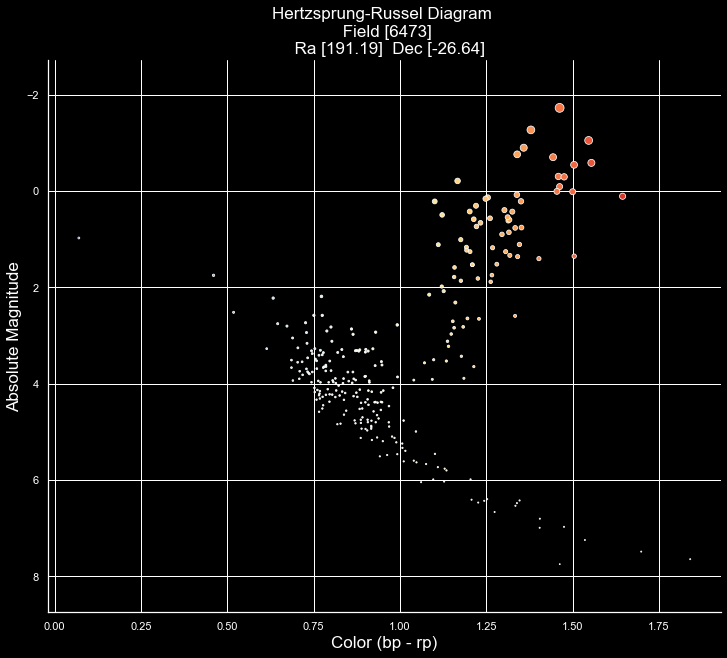

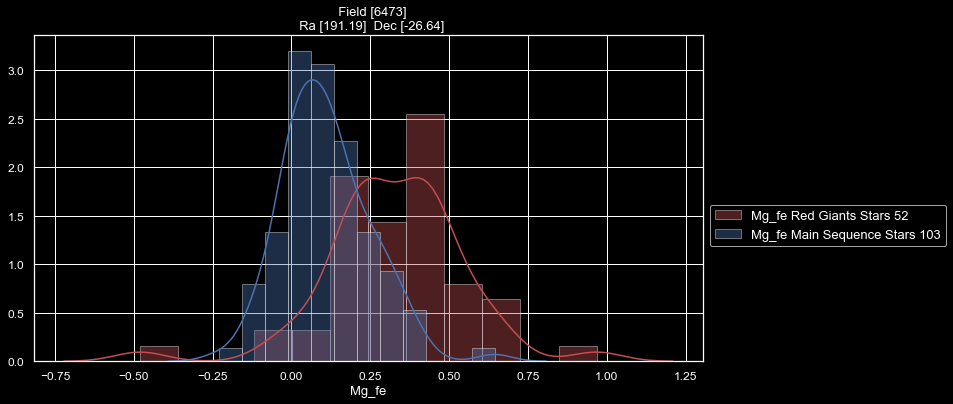


Mg_fe Red Giants 0.33
Mg_fe Main Sequence 0.11

Mg_fe Red Giants kpc 2.52
Mg_fe Main Sequence kpc 0.44


Field [144]  Ra [315.42]  Dec [-48.73]

Stars: 302
main_sequence: 135
turnoff: 79
subgiants: 14
red_clump: 11
red_giants: 63

R_sun Max: 177.35


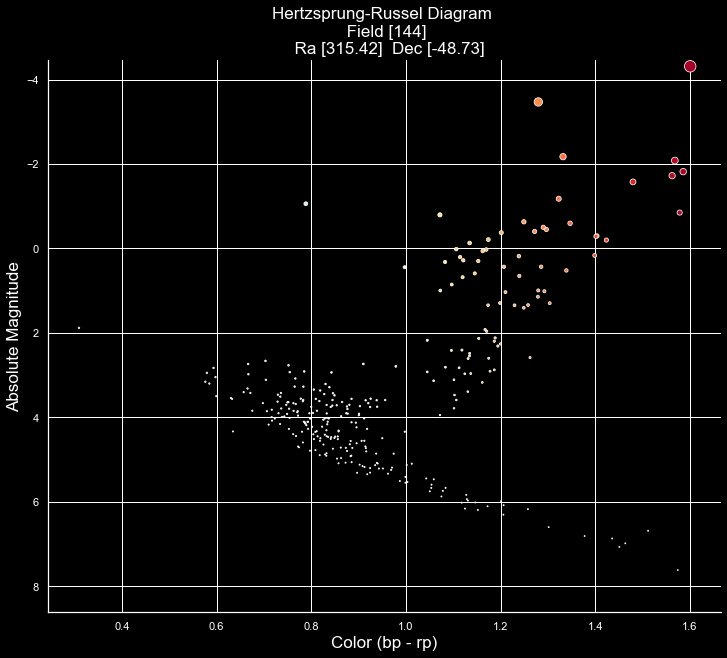

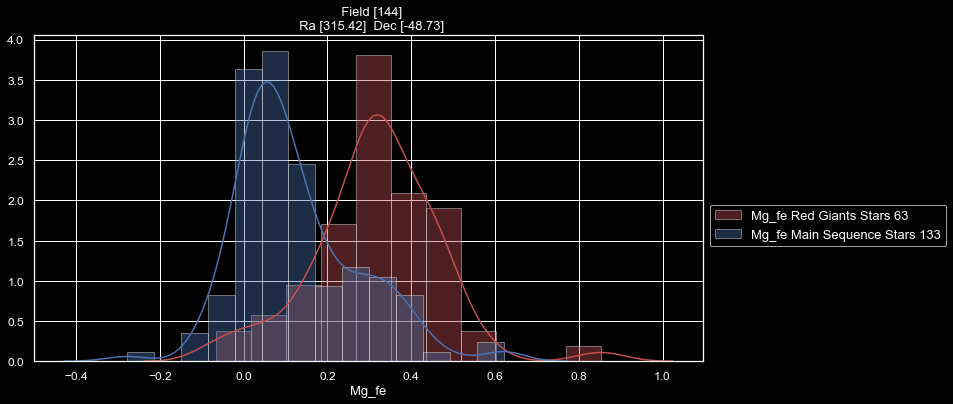


Mg_fe Red Giants 0.32
Mg_fe Main Sequence 0.13

Mg_fe Red Giants kpc 3.75
Mg_fe Main Sequence kpc 0.48


Field [51]  Ra [6.39]  Dec [-72.05]

Stars: 202
main_sequence: 36
turnoff: 31
subgiants: 10
red_clump: 40
red_giants: 85

R_sun Max: 66.19


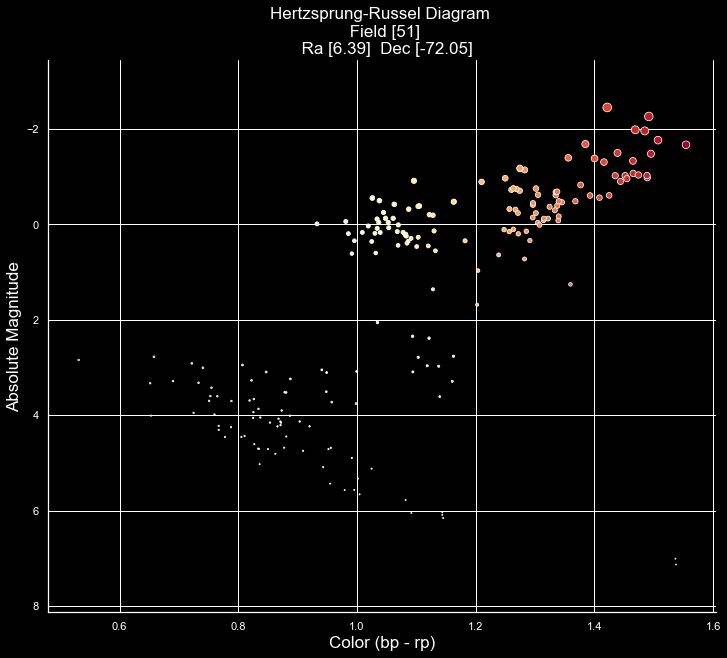

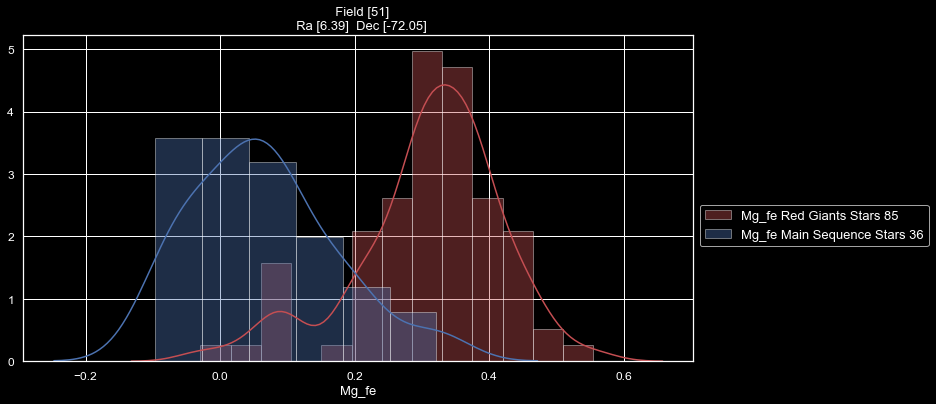


Mg_fe Red Giants 0.31
Mg_fe Main Sequence 0.06

Mg_fe Red Giants kpc 4.88
Mg_fe Main Sequence kpc 0.46


Field [671]  Ra [302.31]  Dec [-41.05]

Stars: 290
main_sequence: 100
turnoff: 76
subgiants: 20
red_clump: 28
red_giants: 66

R_sun Max: 156.55


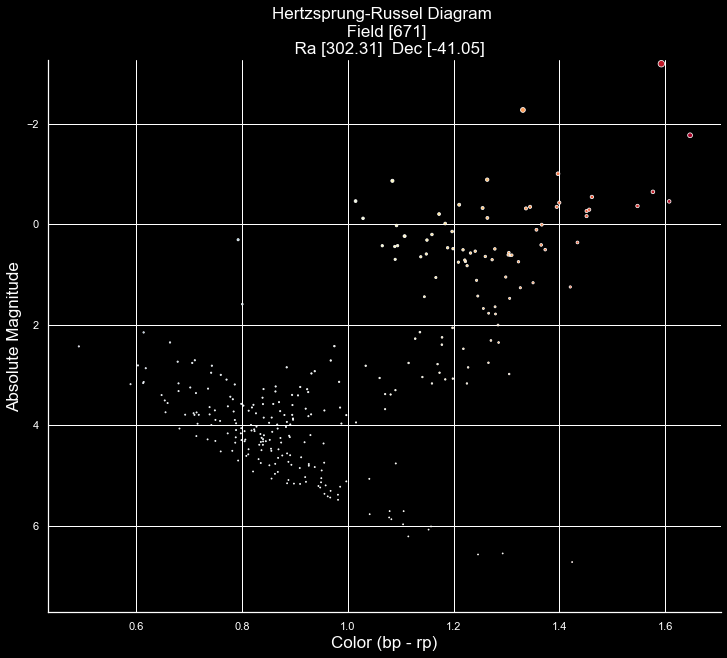

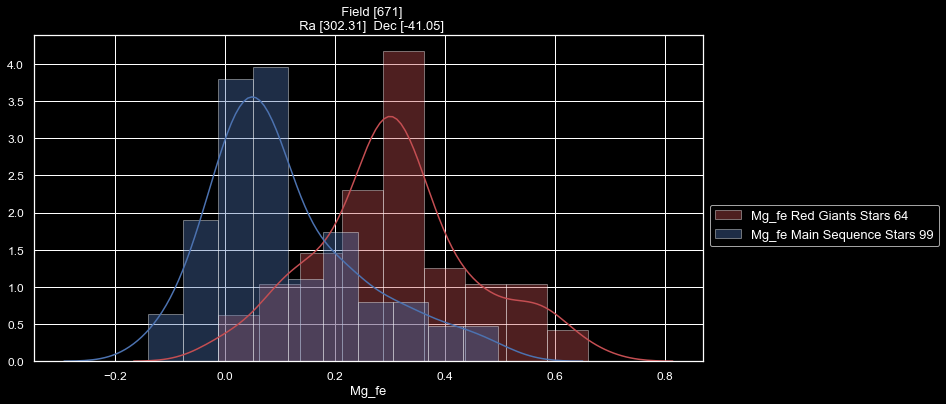


Mg_fe Red Giants 0.31
Mg_fe Main Sequence 0.11

Mg_fe Red Giants kpc 3.76
Mg_fe Main Sequence kpc 0.51


Field [5339]  Ra [214.52]  Dec [-40.96]

Stars: 282
main_sequence: 79
turnoff: 56
subgiants: 24
red_clump: 30
red_giants: 93

R_sun Max: 206.19


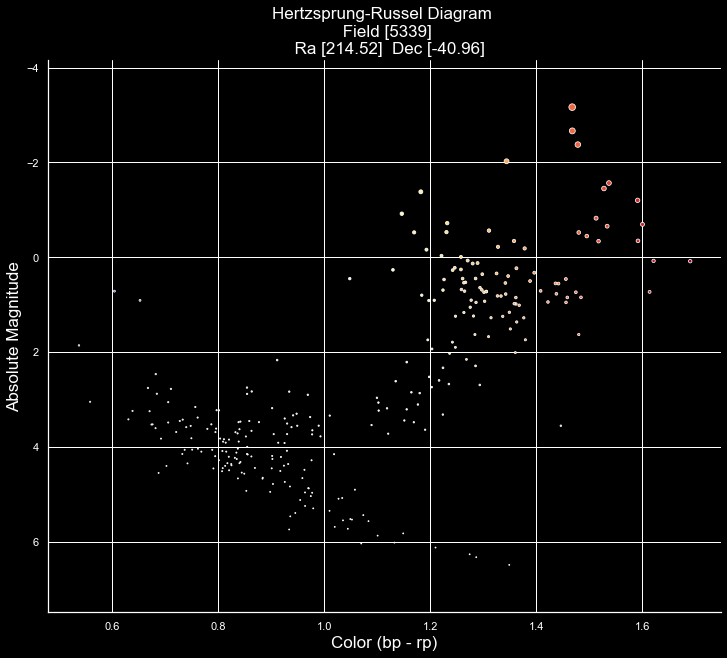

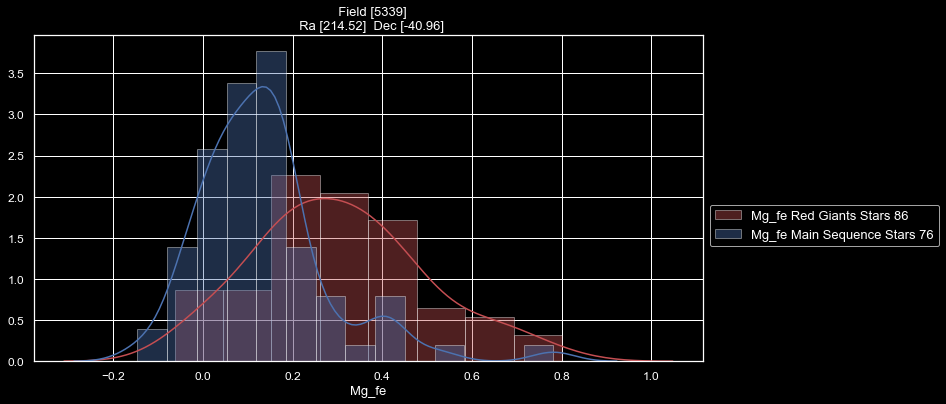


Mg_fe Red Giants 0.31
Mg_fe Main Sequence 0.13

Mg_fe Red Giants kpc 4.23
Mg_fe Main Sequence kpc 0.52


Field [6840]  Ra [8.25]  Dec [-57.01]

Stars: 250
main_sequence: 145
turnoff: 54
subgiants: 14
red_clump: 8
red_giants: 29

R_sun Max: 32.52


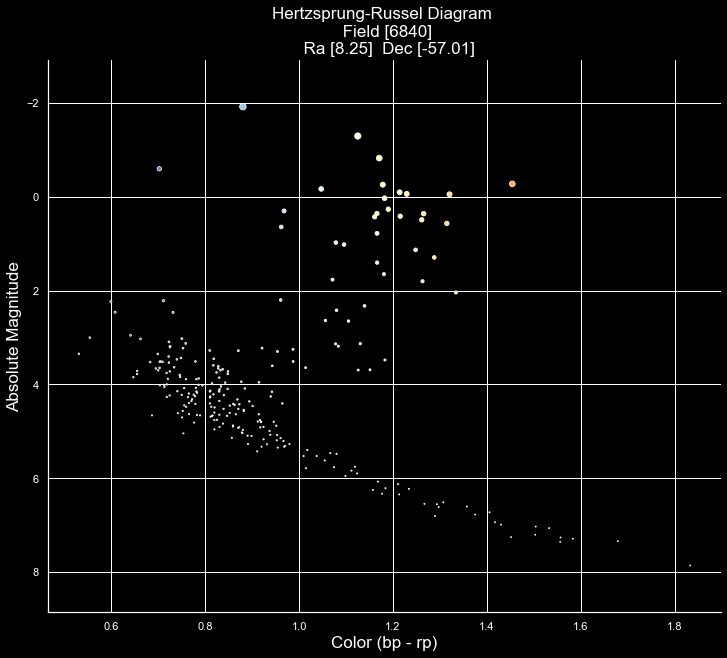

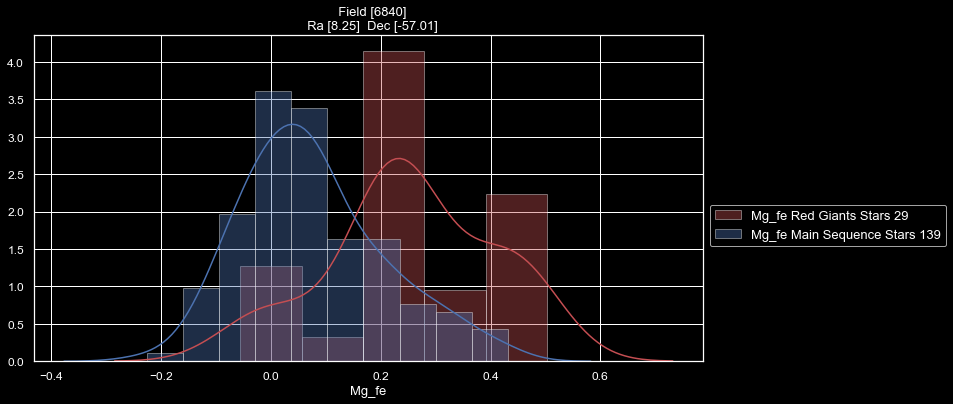


Mg_fe Red Giants 0.28
Mg_fe Main Sequence 0.08

Mg_fe Red Giants kpc 3.22
Mg_fe Main Sequence kpc 0.49


Field [6807]  Ra [158.25]  Dec [10.01]

Stars: 215
main_sequence: 131
turnoff: 51
subgiants: 9
red_clump: 1
red_giants: 23

R_sun Max: 37.22


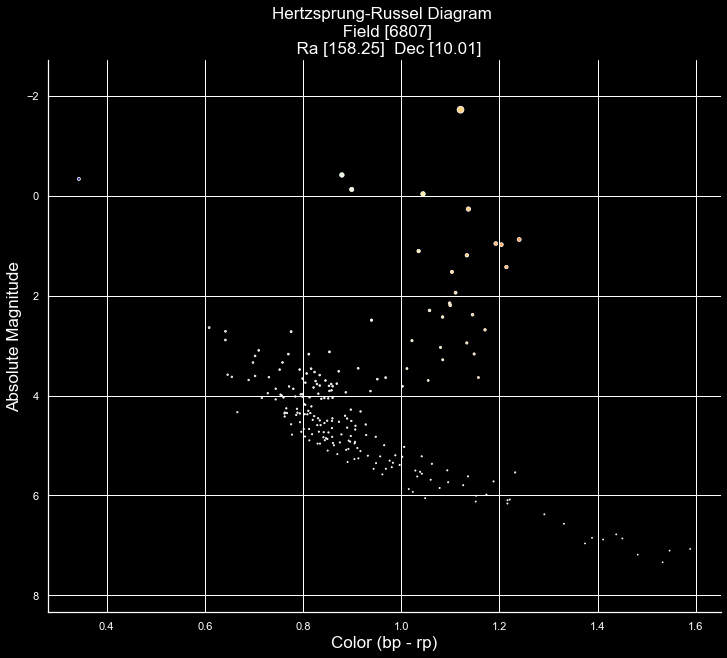

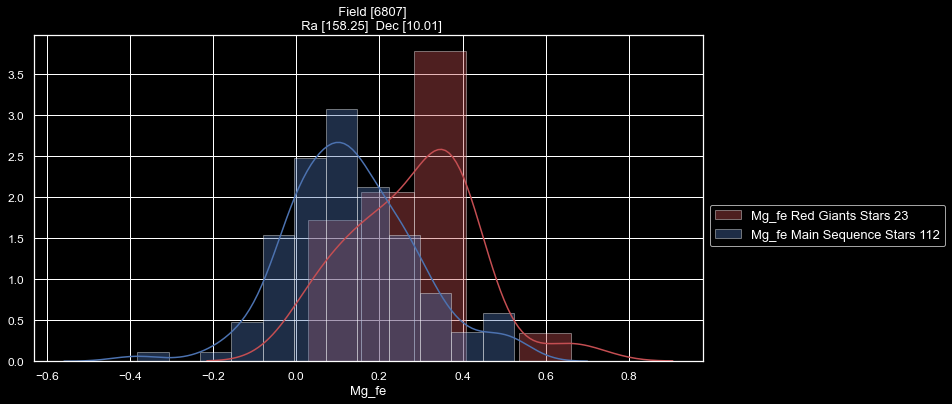


Mg_fe Red Giants 0.28
Mg_fe Main Sequence 0.13

Mg_fe Red Giants kpc 3.48
Mg_fe Main Sequence kpc 0.62


Field [6806]  Ra [157.8]  Dec [7.14]

Stars: 258
main_sequence: 162
turnoff: 47
subgiants: 24
red_clump: 8
red_giants: 17

R_sun Max: 41.54


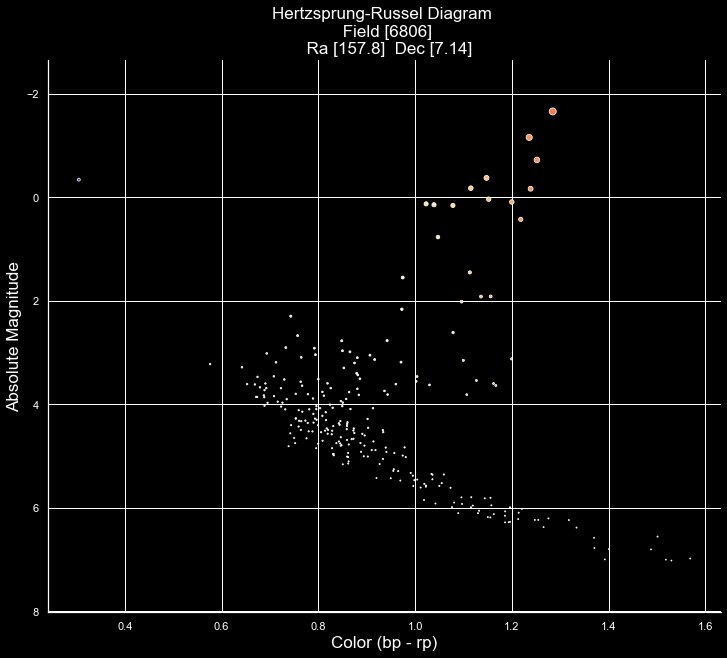

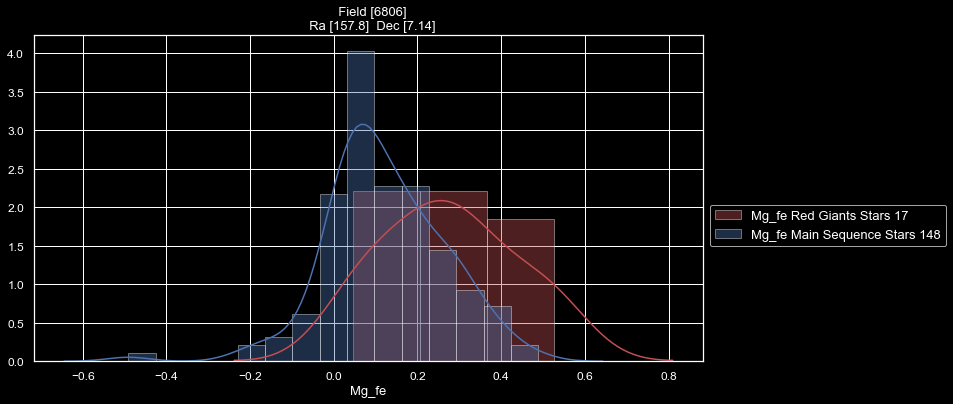


Mg_fe Red Giants 0.28
Mg_fe Main Sequence 0.12

Mg_fe Red Giants kpc 4.76
Mg_fe Main Sequence kpc 0.64


Field [29]  Ra [323.6]  Dec [-50.89]

Stars: 21
main_sequence: 9
turnoff: 8
subgiants: 1
red_clump: 0
red_giants: 3

R_sun Max: 9.62


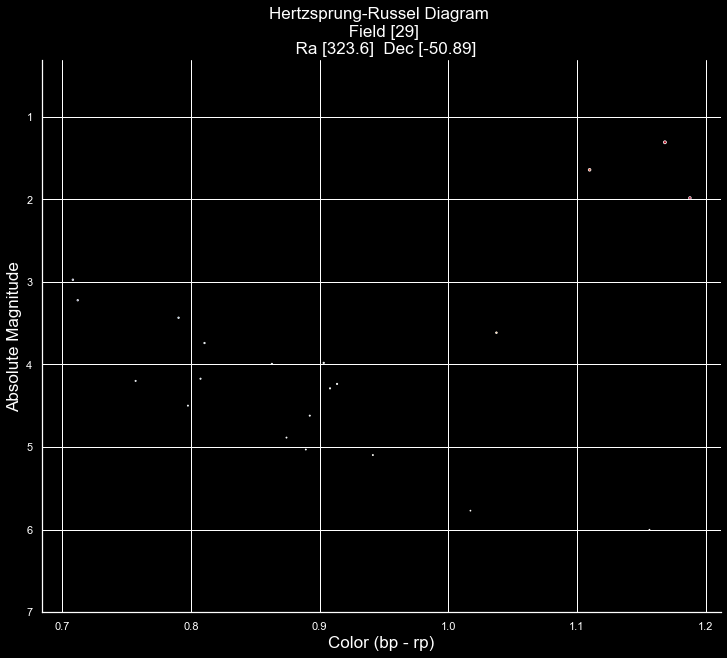

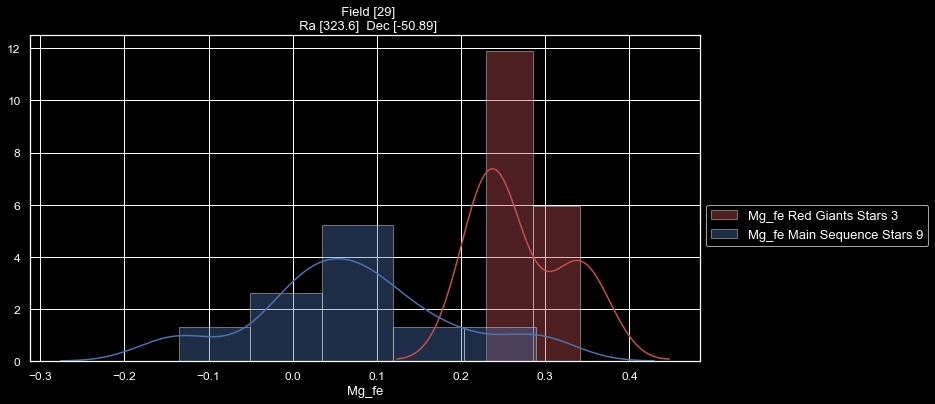


Mg_fe Red Giants 0.27
Mg_fe Main Sequence 0.07

Mg_fe Red Giants kpc 1.71
Mg_fe Main Sequence kpc 0.46


Field [23]  Ra [329.3]  Dec [-58.34]

Stars: 271
main_sequence: 122
turnoff: 68
subgiants: 16
red_clump: 13
red_giants: 52

R_sun Max: 39.52


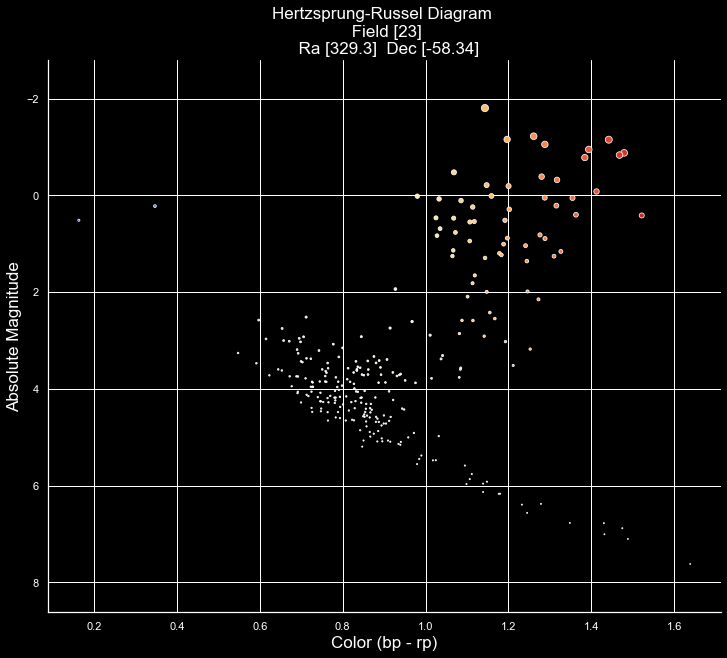

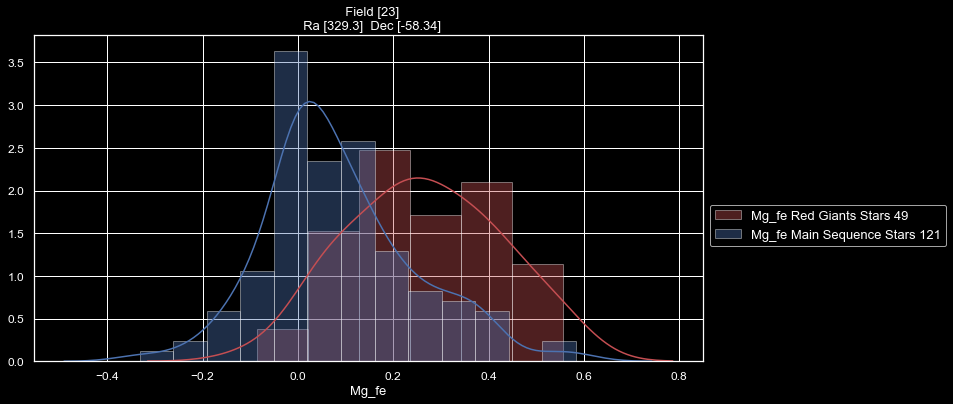


Mg_fe Red Giants 0.27
Mg_fe Main Sequence 0.09

Mg_fe Red Giants kpc 2.86
Mg_fe Main Sequence kpc 0.5


8 seconds elapsed

Done!


In [14]:
################################################################################################################################################

timer_start()


print("\nStarting HR Diagram Plotting Loop")


for field in alpha_field_list:

        f1 = df_GALAH[df_GALAH['field_id'] == int(field)]
        field_name = " "
        
        f1_ra = f1['ra'].mean()
        f1_dec = f1['dec'].mean()
        field_list =  "Ra [" + str(round(f1_ra, 2)) + ']' + "  Dec [" + str(round(f1_dec, 2)) + ']'
        
        print('\n\n' + 'Field ['  + str(field)+ ']' + '  ' + str(field_list) )

        main_sequence = f1[f1['logg'].astype(float) > 4.20]
        turnoff       = f1[(f1['logg'].astype(float) < 4.20) & (f1['logg'].astype(float) > 3.90)]
        subgiants     = f1[(f1['logg'].astype(float) < 3.90) & (f1['logg'].astype(float) > 3.60)]
        red_clump     = f1[(f1['logg'].astype(float) < 2.55) & (f1['logg'].astype(float) > 2.35)]
        red_clump_id  = red_clump.star_id.astype(str)
        reds          = f1[f1['logg'].astype(float) < 3.60]
        red_giants    = reds[~reds['star_id'].isin(red_clump_id)]
        
        print("\nStars: " + str(f1.shape[0]))
        print("main_sequence: " + str(main_sequence.shape[0]))
        print("turnoff: " + str(turnoff.shape[0]))
        print("subgiants: " + str(subgiants.shape[0]))
        print("red_clump: " + str(red_clump.shape[0]))
        print("red_giants: " + str(red_giants.shape[0]))

        
        if f1.shape[0] > 10:
            
            print('\nR_sun Max: ' + str(f1['R_sun'].max()))
            
            sns.set()
            
            ### Plot 001
            rr1 = f1[(f1.R_sun > 0) & (f1.R_sun <= 100) ]
            plt.style.use('dark_background')
            sns.relplot(x='bp_rp', y='M', height=8.5, aspect=1.2, legend=None,
                        hue='bp_rp',
                        palette='RdYlBu_r',
                        size='R_sun',
                        sizes=(1,rr1['R_sun'].max()/rr1['R_sun'].min()),
                        data=f1
                        )
            plt.ylim(rr1['M'].max()+1, rr1['M'].min()-1)
            plt.xlabel('Color (bp - rp)', fontsize = 17)
            plt.ylabel('Absolute Magnitude', fontsize = 17)
            plt.title('Hertzsprung-Russel Diagram ' +  '\n Field ['  + str(field)+ ']' + '\n  ' 
                      + str(field_list), fontsize = 17)
            plt.show()   
            
            
            
            
            ### Plot 002
            """sns.set()
            rr1 = f1[f1.R_sun > 0]
            plt.style.use('dark_background')
            sns.relplot(x='ra', y='dec', height=8.5, aspect=1.2, legend=None,
                        hue='bp_rp',
                        palette='RdYlBu_r',
                        size='R_sun',
                        sizes=(1,rr1['R_sun'].max()/rr1['R_sun'].min()),
                        data=f1
                        )
            plt.xlabel('Ra', fontsize = 17)
            plt.ylabel('Dec', fontsize = 17)
            plt.title(' Field ['  + str(field)+ ']' + '\n  ' + str(field_list) + '\nStars: ' + str(f1.shape[0]), fontsize=15)
            
            plt.show()  """
            
                
            for element in element_cols3:
                ChartHistElement(red_giants, "Red Giants", main_sequence, "Main Sequence", element)
                
timer_stop()

print("\nDone!")